# Telco Custumer Churn

Neste projeto irei construir um modelo de machine learnig para prever a possibilidade de um cliente cancelar o contrato com uma operadora de telecocomunicações. Trata-se de um problema de aprendizado supervisionado (utilizando um conjunto de dados rotulado) de classificação, em que o alvo (target) é 1 se o cliente cancelou o serviço e 0 caso contrário.

Pipiline de resolução usado no projeto(baseado no CRISPIM-DM)
1. Definir o problema de negócio.

2. Coletar os dados e obter uma visão geral deles.

3. Dividir os dados em conjuntos de treino e teste.

4. Explorar os dados (Análise Exploratória de Dados – EDA).

5. Engenharia de atributos, limpeza e pré-processamento dos dados.

6. Treinamento dos modelos, comparação, seleção de atributos e ajuste de hiperparâmetros.

7. Teste final do modelo em produção e avaliação.

8. Conclusão e interpretação dos resultados do modelo.

9. Implantação (deploy).


Neste notebook, realizarei a análise exploratória de dados (EDA), contemplando as etapas 1 a 4 do pipeline apresentado acima. O principal objetivo desta fase é identificar padrões e insights que forneçam informações valiosas sobre o comportamento dos clientes que cancelam o serviço (churners), com base nas variáveis disponíveis.




## 1. Business problem and project objective

### 1.1 Qual é o problema do negócio?
  Uma empresa de telecomunicações apresenta uma taxa considerável de rotatividade de clientes. Atualmente, diversos consumidores estão trocando os serviços oferecidos pela companhia pelos da concorrência. Seria de grande valor estratégico se a operadora conseguisse prever quais clientes estão em risco de cancelar seus contratos nos próximos meses.

### 1.2 Entendimento do Problema
  A rotatividade de clientes (*Churn Rate*) é um dos maiores desafios no setor de telecomunicações. Mesmo uma taxa de perda de 1% pode significar prejuízos milionários quando aplicada a uma base massiva de usuários.
  
  O objetivo central deste projeto não é apenas calcular o churn, mas antecipá-lo. Buscamos responder: **quais clientes têm alta probabilidade de cancelamento no curto prazo?**
  
  Ao identificar padrões ocultos de comportamento — muitas vezes antes que o próprio cliente tome a decisão consciente de sair — a empresa pode substituir estratégias genéricas por ações de retenção cirúrgicas, focadas exclusivamente nos perfis de alto risco, otimizando o orçamento de marketing e preservando a receita.

### 1.3 Contexto do negócio: KPIs Importantes
  Para entender o impacto financeiro do problema, analisamos os seguintes indicadores de performance (KPIs) de Custo e Eficiência de Aquisição:
  
  * **CAC (Customer Acquisition Cost):** Talvez o mais importante. Mede o total investido em marketing, publicidade, comissões de vendas e sistemas, dividido pelo número de novos clientes conquistados em um determinado período.
  * **LTV (Lifetime Value):** Estima a receita total que um cliente trará para a empresa durante todo o tempo em que permanecer como assinante.
  * **ARPU (Average Revenue Per User):** Avalia o valor médio mensal gerado por cada novo cliente, essencial para calcular o potencial de retorno.
  * **Churn Rate (Taxa de Cancelamento) Inicial:** Monitora se os novos clientes estão cancelando logo após a assinatura, o que pode indicar problemas no processo de vendas.

> **Por que estes KPIs são importantes para Telecom?**
> O mercado de telecomunicações é extremamente competitivo, com altos custos de infraestrutura e aquisição. Monitorar o CAC e o LTV é fundamental para garantir que a empresa não esteja gastando mais para adquirir um cliente do que o valor que ele gera a longo prazo.

### 1.4 Objetivos do Projeto
  * Identificar os principais fatores e variáveis envolvidos no churn.
  * Construir um modelo de Machine Learning capaz de prever quais clientes cancelarão o serviço.
  * Promover insights para ações direcionadas de redução da taxa de churn.

### 1.5 Benefícios do Projeto
  * Retenção de clientes
  * Proteção de receita
  * Serviço personalizado 
  * Marketing Otimizado 
  * Inteligência de Negócio



# Importando as bibliotecas 

In [1]:
# Visualização e manipulação do dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2. Entendendo os dados 

Está base de dados pode ser encontrada em: https://www.kaggle.com/code/emineyetm/telco-customer-churn

Original de: https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


In [2]:
data_patch = '../data/WA_Fn-UseC_-Telco-Customer-Churn.xls'

df = pd.read_csv(data_patch)


In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Dicionário: 

**customerID** – identificador único do cliente

**gender** – indica se o cliente é do sexo masculino ou feminino

**SeniorCitizen** – indica se o cliente é idoso ou não (1 = sim, 0 = não)

**Partner** – indica se o cliente possui um(a) parceiro(a) (Sim, Não)

**Dependents** – indica se o cliente possui dependentes (Sim, Não).
Um dependente é uma pessoa que depende de outra como principal fonte de renda.

**tenure** – número de meses que o cliente permaneceu na empresa

**PhoneService** – indica se o cliente possui serviço de telefone (Sim, Não)

**MultipleLines** – indica se o cliente possui múltiplas linhas telefônicas (Sim, Não, Sem serviço de telefone)

**InternetService** – provedor de serviço de internet do cliente (DSL, Fibra óptica, Nenhum)

**OnlineSecurity** – indica se o cliente possui segurança online (Sim, Não, Sem serviço de internet)

**OnlineBackup** – indica se o cliente possui backup online (Sim, Não, Sem serviço de internet)

**DeviceProtection** – indica se o cliente possui proteção de dispositivos (Sim, Não, Sem serviço de internet)

**TechSupport**– indica se o cliente possui suporte técnico (Sim, Não, Sem serviço de internet)

**StreamingTV** – indica se o cliente possui serviço de streaming de TV (Sim, Não, Sem serviço de internet)

**StreamingMovies** – indica se o cliente possui serviço de streaming de filmes (Sim, Não, Sem serviço de internet)

**Contract** – tipo de contrato de acordo com a duração (Mensal, Anual, Bienal)

**PaperlessBilling** – indica se as faturas são emitidas de forma digital (Sim, Não)

**PaymentMethod** – método de pagamento utilizado pelo cliente
(Cheque eletrônico, Cheque enviado pelo correio, Cartão de crédito (automático), Transferência bancária (automática))

**MonthlyCharges** – valor cobrado mensalmente pelo serviço

**TotalCharges** – valor total acumulado cobrado durante o período de assinatura (tenure)

Informações do dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataset tem 7043 linhas e 21 colunas


Irei transformar a coluna "TotalCharges" para o tipo float64, pois a mesma é composta por dados númericos 

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#procurando por valores nulos 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Irei substituir os valores nulos de "TotalCharges" por zero, pois os mesmo são referentes aos clientes que ainda não completaram um mês de serviço. 

In [9]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [10]:
df.describe().T  #include = "all"

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


Alguns insigts: 

* A quantidade de clientes que são ou não são idosos apresenta uma variação alta, indicando que existe um público denso de pessoas abaixo dos 60.
* Consíderavel parte dos clientes tem dependentes e são casados
* Um pouco mais da metade dos clientes não utilizaos serviçoes oferecidos pela empresa como segurança online, backup, suporte técnico e etc
* A quantidae de messes que um cliente permanece na empresa tem uma variação moderada, o que pode indicar falta de política de fidelização ou que os clientes percebem que não estão utilizando os serviços?
* A grande maioria dos clientes emite notas fiscais digitais, porém uma parte imprimi as notas.
* A maioria dos clientes pagam o valor de 75.35 mensais, pórem alguns clientes pagam 118.75, o é que quase o dobro da média.
*  A média do TotalCharges (2279) é bem maior que a mediana (1394). Isso indica uma assimetria positiva (à direita). Temos poucos clientes que gastam muito (perto do máximo de 8684), o que puxa a média para cima.

In [11]:
#procurando valores duplicados 
df.duplicated().sum()

np.int64(0)

Irei remover algumas tabelas, cujos valores não contribuem de forma significativa para a análise, transformar as colunas que estão com objetos em catégorias e padronizar o nome das colunas (tenure e gender)

In [12]:
df = df.drop('customerID', axis=1)


In [13]:
#padronizando nomes das colunas
df = df.rename(columns={'gender' : 'Gender', 
                        'tenure' : 'Tenure' })

In [14]:
#modificando tipos das colunas 
categorical_columns = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 
    'Gender', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in categorical_columns:
    if col in df.columns:  
        df[col] = df[col].astype('category')

In [15]:
print(df[categorical_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Partner           7043 non-null   category
 1   Dependents        7043 non-null   category
 2   PhoneService      7043 non-null   category
 3   PaperlessBilling  7043 non-null   category
 4   Churn             7043 non-null   category
 5   MultipleLines     7043 non-null   category
 6   InternetService   7043 non-null   category
 7   Contract          7043 non-null   category
 8   PaymentMethod     7043 non-null   category
 9   Gender            7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
dtypes: category(16)
memory u

## 3. Separando os dados entre treino e teste (Split)

* Irei separar os dados de treino e teste antes do EDA para evitar DataLekage, e garantir a capacidade de generalização do modelo
  

In [21]:
X = df.drop(columns=['Churn'])
y = df['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state= 42)

print(f"Treino: {X_train.shape[0]} amostras | Teste: {X_test.shape[0]} amostras")

Treino: 5634 amostras | Teste: 1409 amostras


In [17]:
print(f"Treino: {y_train.value_counts(normalize = True)}")
print(f"Teste: {y_test.value_counts(normalize = True)}")

Treino: Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64
Teste: Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64


* as proporções de treino e teste foram mantidas. 

## 4. Análise Exploratória de Dados

Explorarei o conjunto de treinamento com o objetivo de compreender a distribuição individual das variáveis, bem como identificar relações, correlações, padrões e tendências presentes nos dados. Nessa etapa, buscarei extrair insights relevantes, especialmente em relação à variável alvo (Churn).

Para isso, realizarei análises univariadas, bivariadas e multivariadas. Além disso, utilizarei um conjunto de dados completo — contendo as variáveis preditoras e a variável alvo — para empregar o parâmetro hue nas visualizações com a biblioteca seaborn e analisar a matriz de correlação.

In [53]:
#definindo paleta de cores

%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

churn_palette = [
    '#004B8D',  # Azul Marinho Profundo
    '#D92121',  # Vermelho Intenso (Churn)
    '#0074BC',  # Azul Médio
    '#E85C5C',  # Vermelho Coral
    '#5CA4E8',  # Azul Céu
    '#F4A4A4',  # Rosa Pastel
]

# Setting as the palette
sns.set_palette(sns.color_palette(churn_palette))
# Display
sns.color_palette(churn_palette)

[(0.0, 0.29411764705882354, 0.5529411764705883),
 (0.8509803921568627, 0.12941176470588237, 0.12941176470588237),
 (0.0, 0.4549019607843137, 0.7372549019607844),
 (0.9098039215686274, 0.3607843137254902, 0.3607843137254902),
 (0.3607843137254902, 0.6431372549019608, 0.9098039215686274),
 (0.9568627450980393, 0.6431372549019608, 0.6431372549019608)]

In [51]:
df_train = pd.concat([X_train, y_train], axis = 1)

df_train.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
3151,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
4860,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No


Vou seperar os dados catégoricos dos númericos, para analisar os mesmo separadamente. 

In [20]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('category').columns.tolist()

target = 'Churn'

print(f"Análise de Estrutura:")
print(f"--- Numericas ({len(numerical_features)}): {numerical_features}")
print(f"--- Categóricas ({len(categorical_features)}): {categorical_features}")
print(f"--- Alvo: {target}")


Análise de Estrutura:
--- Numericas (4): ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
--- Categóricas (15): ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
--- Alvo: Churn


([<matplotlib.patches.Wedge at 0x70faf9a90200>,
 [Text(-0.8145236303634232, -0.7392910493030398, 'No'),
  Text(0.8145237419932567, 0.739290926313385, 'Yes')],
 [Text(-0.44428561656186716, -0.4032496632562035, '73.5%'),
  Text(0.4442856774508673, 0.4032495961709372, '26.5%')])

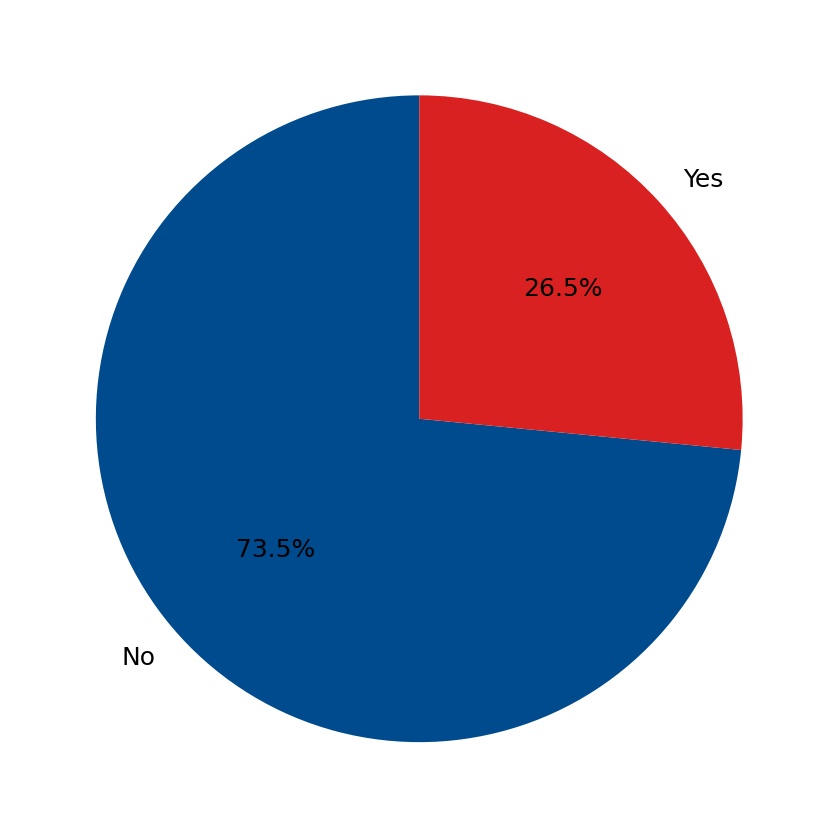

In [49]:
# Dimensionando o tamanho do churn 

churn_rate = df['Churn'].value_counts(normalize = True).mul(100).round(2)

plt.figure(figsize = (7,7))

plt.pie(
    churn_rate, 
    labels = churn_rate.index,
    autopct='%1.1f%%',
    startangle = 90
    
)

